# Проект по анализу данных

## Общая информация

Дата выдачи: 05.06.2016

Срок сдачи: 19.06.2016 09:00MSK

### О задании
В рамках курса "Интеллектуальный анализ данных" помимо выполнения контрольных и практических заданий вам также нужно выполнить проект. За каждый модуль ставится отдельная оценка. В этом модуле вы продолжите работу с данными, которую начали в прошлом модуле, построив модели для предсказания. 

Пустые ячейки оставлены там, где нужно написать код либо ответить на вопросы.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Помимо кода вам также требуется написать развернутые ответы на вопросы.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить задание на указанных в ответном письме условиях.

Задание выполняется САМОСТОЯТЕЛЬНО. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Если вы будете решать задание на виртуальной машине, учтите, что его могут видеть все. К тому же недоступность виртуальной машины не является уважительной причиной для продления дедлайна.

Обратите внимание, что на устном зачете в конце семестра некотоые вопросы могут быть связаны с проектом.

### Доп. баллы
В данном проекте вам будет предложено рассмотреть некоторые интересные закономерности в данных. Если вы обнаружите что-то интересное (например, в последнем пункте), либо у вас есть идеи как можно работать с данным датасетом — присылайте, это будет поощряться дополнительными баллами. Кроме того, вы можете выступить со своим личным исследованием на семинаре, это также не останется незамеченным.

### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: Username_(group)_Project.ipynb, где Username — ваша фамилия на латинице, group — название группы (например, Kozlova_IAD-11_Project.ipynb). Далее отправьте этот файл на используемую в Вашей группе почту курса (hse.minor.dm@gmail.com) c темой письма [ИАД-NN] - Проект - Фамилия Имя Отчество.

## Определение итоговой оценки студента

Если вы не помните, с каким именно датасетом работали, то можете воспользоваться функцией *get_dataset_name*, на вход ей передав ваш адрес электронной почты.

In [2]:
def get_dataset_name(email):
    return 'student-mat.csv' if sum(ord(c) for c in email) % 2 else 'student-por.csv'

Выполните код ниже, передав на вход строку с адресом электронной почты:

In [3]:
get_dataset_name('')

'student-por.csv'

Датасеты имеют следующий набор признаков:
 - school - тип школы ("GP" - Gabriel Pereira или "MS" - Mousinho da Silveira)
 - sex - пол ("F" - female или "M" - male)
 - age - возраст (от 15 до 22)
 - address - откуда студент ("U" - urban или "R" - rural)
 - famsize - размер семьи ("LE3" - меньше или равно 3 или "GT3" - больше 3)
 - Pstatus - в каких отношениях родители ("T" - живут вместе "A" - раздельно)
 - Medu - образование матери (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Fedu - образование отца (0 - никакого,  1 - начальное образование (4 класса), 2 – от 5 до 9 классов, 3 – среднеспециальное или 4 – высшее)
 - Mjob - работа матери ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - Fjob - работа отца ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
 - reason - причина выбора школы (близко к дому — "home", репутация школы — "reputation", "course" предпочтение некоторым предметам или "other")
 - guardian - опекун ("mother", "father" или "other")
 - traveltime - время от дома до школы (1 - меньше 15 мин., 2 - 15 до 30 мин., 3 - 30 мин. до 1 часа, или 4 - больше 1 часа)
 - studytime - количество часов обучения в неделю (1 - меньше 2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - больше 10 часов)
 - failures - колисечтво ранее не сданных предметов (n if 1 <= n < 3, else 4)
 - schoolsup - дополнительные занятия (yes or no)
 - famsup - помощь от семьи при выполнении заданий (yes or no)
 - paid - дополнительные платные занятия (yes or no)
 - activities - внеклассная деятельность (yes or no)
 - nursery - посещал детский сад (yes or no)
 - higher - желание высшего образования (yes or no)
 - internet - домашний интернет (yes or no)
 - romantic - состоит в романтических отношениях (yes or no)
 - famrel - насколько хорошо отношения в семье (от 1 - очень плохие до 5 - превосходные)
 - freetime - наличие свободного времени после школы (от 1 - очень мало до 5 - очень много)
 - goout - гуляет с друзьями (от 1 - редко до 5 - очень часто)
 - Dalc - употребление алкоголя в будние дни (от 1 - очень редко до 5 - очень часто)
 - Walc - употребление алкоголя в выходные (от 1 - очень редко до 5 - очень часто)
 - health - текущее состояние здоровья (от 1 - очень плохое до 5 - очень хорошее)
 - absences - количество школьных пропусков (от 0 до 93)

Признаки ниже связаны с курсом (математика/португальский)
 - G1 - оценка за первый семестр (от 0 до 20)
 - G2 - оценка за второй семестр (от 0 до 20)
 - [целевая переменная] G3 - итоговая оценка (от 0 до 20)

In [4]:
import numpy as np
import pandas as pd
import scipy as sp
import pylab as plt

%matplotlib inline

Для начала загрузите данные. Обратите внимание, чтобы данные были загружены верно (был указан верный разделитель, а так же корректно отображались названия столбцов). Чтобы это проверить, а также посмотреть, что представляют из себя данные, можно вывести первые несколько строк загруженного датасета на экран.

In [5]:
df = pd.read_csv('student-por.csv', sep = ';')

In [6]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


Разделите признаки и целевую зависимость в две отдельные переменные *X* и *y*.

In [7]:
X = df.drop('G3', axis=1).as_matrix()
y = df['G3'].as_matrix()

Как можно видеть (и как показали эксперименты ранее) в данных есть числовые признаки (например, *age*), а так же категориальные (*guardian*). Для начала поработает только с числовыми признаками. 

Создайте две новых матрицы с признаками: в первой будут только числовые признаки, во второй — все остальные. Для этого удобно воспользоваться методом датафрейма [select_dtypes](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html).

In [8]:
newdf = df.drop('G3', axis=1)
mat1 = newdf.select_dtypes(include=[np.number]) #numeric

mat2 = newdf.select_dtypes(include = [object]) #object

In [9]:
list(mat1.columns.values)

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

целевая переменная не является признаком

In [10]:
mat1.shape
print('number of features=', mat1.shape[-1])

('number of features=', 15)


In [11]:
mat2.shape
print('number of features=', mat2.shape[-1])

('number of features=', 17)


Для оценки качества выберете одну из метрик:
 - коэффициент детерминации [r2](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)
 - [MAE](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
 - [MSE](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

Теперь будем строить модели для предсказания, используя пока только числовые признаки. Вам нужно будет рассмотреть следующие модели:
 - линейную регрессию [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
 - регуляризованную линейную регрессию — одну из моделей [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) или [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
 - случайный лес [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) со 100 деревьями
 - метод ближайших соседей [KNeighborsRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

Для следующих моделей вам нужно подобрать оптимальные гиперпараметры с помощью 5-fold кросс-валидации:
 - коэффициент при регуляризаторе в случае Ridge и Lasso
 - максимальную глубину деревьев для RandomForest
 - количество соседей для KNeighborsRegressor
 
Вы можете перебрать несколько (3-5) значений соответствующего параметра. Скорее всего вам удобно будет воспользоваться:
 - классом [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html) чтобы создать объект для кросс-валидации
 - классом [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) имеющим параметры:
   - *estimator* некоторая модель, например, *KNeighborsRegressor()*
   - *param_grid* — словарь с оптимизируемыми параметрыми, например, *{'n_neighbors': [1, 3, 5, 15]}*
   - *scoring* — название оптимизируемой метрики (*r2_score*, *mean_squared_error* либо *mean_absolute_error*) в зависимости от того, какую метрику вы выбрали
   - *cv* — схема кросс-валидации (здесь можно указать созданный ранее объект KFold)
   
   после создания объекта вам нужно вызвать метод *fit*, после чего у обученного объекта посмотреть поле *best\_params\_*, где будут сохранены оптимальные в данном случае параметры. [Пример использования](http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html).
   
**(4 балла)** Подберите оптимальные значения гиперпараметров для указанных выше моделей.

In [13]:
#выборка
X = mat1.as_matrix()
y = df['G3'].as_matrix()

#train_X = num_data_train[train_indices, :]; train_Y = num_targets_train[train_indices]
#test_X = num_data_train[test_indices, :]; test_Y = num_targets_train[test_indices]
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [31]:
from sklearn import grid_search
parameters_lr = {'alpha':[0.0, 0.25, 0.50, 1.0]}
parameters_knn = {'n_neighbors': [5, 10, 25, 50]}
parameters_rf = {'n_estimators':[1, 5, 10, 20], 'max_depth':[5, 10, 15, 20]}

to_do = [(Ridge, parameters_lr), (KNeighborsRegressor, parameters_knn),
         (RandomForestRegressor, parameters_rf)]
results_gs = []
for model, parameters in to_do:
    mod = model()
    clf = grid_search.GridSearchCV(mod, parameters, cv=5)
    clf.fit(X, y)
    results_gs.append(clf)
    print(clf.best_params_)


{'alpha': 1.0}
{'n_neighbors': 10}
{'n_estimators': 20, 'max_depth': 5}


In [37]:
clf.best_estimator_.feature_importances_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

**(2 балла)** Теперь измерьте качество на кросс-валидации для каждой модели с оптимальными параметрами. Для этого удобно воспользоваться функцией [cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html), имеющую параметры, аналогичные *GridSearchCV*.

In [32]:
from sklearn.cross_validation import cross_val_score
parameters_lr = {'alpha':1.0}
parameters_knn = {'n_neighbors': 10}
parameters_rf = {'n_estimators': 20}

to_do = [Ridge(alpha=1.0), KNeighborsRegressor(n_neighbors=10), RandomForestRegressor(n_estimators=20, 
                                                                                      max_depth=5)]
results_cvs = []
for model in to_do:
    #mod = model()
    cvs_scrore = cross_val_score(model, X, y, cv=5, scoring = 'mean_squared_error')
    print(cvs_scrore)
    results_cvs.append((model, cvs_scrore))
    #clf.fit(X, y)
    #results.append(clf)
    #print(clf.best_params_)
#cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, 
#                                         verbose=0, fit_params=None, pre_dispatch='2*n_jobs')[source]

[-0.96472354 -1.86377617 -1.23423232 -1.1053592  -3.61081389]
[-1.19953846 -2.69153846 -1.70507692 -1.904      -6.55922481]
[-0.84673525 -2.30596442 -1.20099895 -1.38826544 -4.25593167]


**(1 балл)** Вернемся к отложенной матрице категориальных признаков. Так как алгоритмы не умеют работать со строковыми данными, преобразуйте их с помощью функции [get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) в числовую матрицу, где значение каждого признака будет закодировано как бинарное. Сколько признаков теперь получилось? 

In [33]:
new_mat2 = pd.get_dummies(mat2)
print('number of features=', new_mat2.shape[-1])

('number of features=', 43)


Объедините две матрицы: с числовыми признаками и закодированными категориальными в полную матрицу признаков. Для этого удобно воспользоваться функцией [concat](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html), указав первым аргументов массив датафреймов, а также *axis=1*.

In [34]:
total_mat = pd.concat([mat1, new_mat2], axis = 1)
total_mat

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
5,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,1,0,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0


*Получилось 58 признаков*

**(1 балл)** Обучите модели с оптимальными параметрами из предыдущего пункта и измерьте качество на полной матрице признаков с помощью функции *cross\_val\_score*.

In [36]:
X = total_mat.as_matrix()
parameters_lr = {'alpha':[0.0, 0.25, 0.50, 1.0]}
parameters_knn = {'n_neighbors': [5, 10, 25, 50]}
parameters_rf = {'n_estimators':[1, 5, 10, 20], 'max_depth':[5, 10, 15, 20]}

to_do = [(Ridge, parameters_lr), (KNeighborsRegressor, parameters_knn),
         (RandomForestRegressor, parameters_rf)]
results_gs = []
for model, parameters in to_do:
    mod = model()
    clf = grid_search.GridSearchCV(mod, parameters, cv=5)
    clf.fit(X, y)
    results_gs.append(clf)
    print(clf.best_params_)

to_do = [Ridge(alpha=0.0), KNeighborsRegressor(n_neighbors=10), RandomForestRegressor(n_estimators=5, 
                                                                                      max_depth=5)]
results_cvs = []
for model in to_do:
    #mod = model()
    cvs_scrore = cross_val_score(model, X, y, cv=5, scoring = 'mean_squared_error')
    print(cvs_scrore)
    results_cvs.append((model, cvs_scrore))

{'alpha': 0.0}
{'n_neighbors': 10}
{'n_estimators': 20, 'max_depth': 5}
[-0.9862023  -2.0140625  -1.34020996 -1.52068247 -3.60617184]
[-1.23407692 -2.84992308 -1.54023077 -1.78084615 -6.16643411]
[-0.91774095 -2.24253723 -1.23419855 -2.01798558 -4.11036475]


**(2 балла)** Ответьте на следующие вопросы:
 - какая из моделей имеет наилучшее качество в первом случае, а какая — во втором?
 - есть ли модели, для которых добавление категориальных признаков дало прирост в качестве?
 - какая из использованных моделей кажется вам наиболее сложной и почему?

**1. Какая из моделей имеет наилучшее качество в первом случае, а какая — во втором?**
Наилучшее качество в первом случае имеет случайный лес (RandomForest), во втором - также RandomForest.

**2. Есть ли модели, для которых добавление категориальных признаков дало прирост в качестве?**
Если сравнивать первые числа (средние значения среднеквадратичной ошибки, то добавление признаков прироста в качестве не дало.

**3. Какая из использованных моделей кажется вам наиболее сложной и почему?**
Наиболее сложным я считаю алгоритм KNN, так как его обучение многоэтапно и зависит от целого ряда факторов. В случайном лесу мы строим деревья, а далее происходит голосование за какой-то класс объектов. В КNN же необходимо вычислить соседей, далее объединить близко лежащие объекты в классы. Надо также учесть, что объекты имеют несколько атрибутов (размерностей) и оставить при обучении наиболее значимые из них. Также в данном алгоритме в выборке должны быть уже классифицированны объекты, чтобы относительно их найти соседей. Как видно, это намного более комплексный алгоритм, чем построение ансамбля деревьев с последующим их голосованием.

**(1 дополнительный балл)** Обучите случайный лес на полной матрице признаков и найдите топ3 наиболее важных признаков. Можно ли дать интерпретацию почему эти признаки оказались наиболее информативными в рамках данной задачи?

In [42]:
rf = RandomForestRegressor(n_estimators=5, max_depth=5)
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

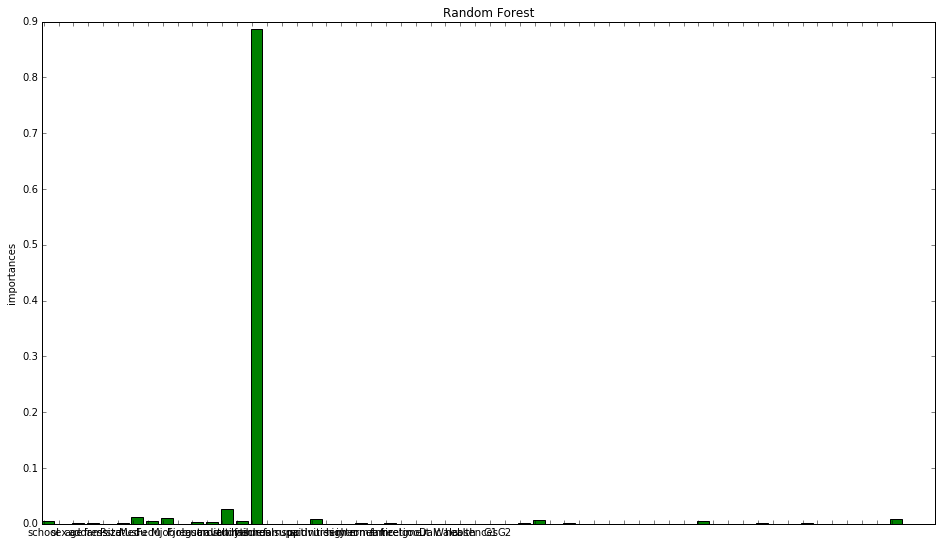

In [56]:
importances_features_fold1 = rf.feature_importances_ 
N = importances_features_fold1.shape[0]
ind = np.arange(N)    

width = 0.7
plt.clf()
plt.close()
plt.figure(figsize=(16,9))
p1 = plt.bar( ind,importances_features_fold1, color='g')
plt.ylabel('importances')
plt.title('Random Forest')

plt.xticks(ind+width/2, df.drop('G3', axis=1).columns)


plt.show()

**Ответ:** Failures является наиболее значительным признаком. Данный признак описывает количество ранее не сданных предметов. Несмотря на то, что мы предсказываем оценку по португальскому, оценки по другим предметам также важны, т.к. формируют общую картину успеваемости школьника. Следующий по значимости - признак, описывающий время, потраченное на дорогу, что тоже влияет на успеваемость, т.к. если школьник тратит много времени на дорогу до школы, у него, скорее всего, остается не так много времени на уроки.